In [1]:
from feature_matching.lightglue_matcher import get_SIFT_features, get_DISK_features, match_features
from pprint import pprint


feats0 = get_SIFT_features('.\\data\\train\\amy_gardens\\peach_0004.png')
feats1 = get_SIFT_features('.\\data\\train\\amy_gardens\\peach_0008.png')
#points0, points1 = match_features(image0_features=feats0, image1_features=feats1, descriptor='sift')
points = match_features(image0_features=feats0, image1_features=feats1, descriptor='sift')
#print(len(points0))
#print(len(points1))
#pprint(points)
pprint(feats0)

c:\Users\felix\OneDrive\Documents\Uni\Deep Learning for Robot Vision\Project\Image_matching_3d\feature_matching\LightGlue\lightglue\lightglue.py:24: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


{'descriptors': tensor([[[0.0327, 0.0783, 0.1020,  ..., 0.0283, 0.0712, 0.1189],
         [0.0744, 0.0512, 0.0818,  ..., 0.1024, 0.0010, 0.0241],
         [0.0684, 0.0769, 0.0222,  ..., 0.0157, 0.0929, 0.1185],
         ...,
         [0.0380, 0.0155, 0.0220,  ..., 0.0822, 0.0677, 0.0761],
         [0.0686, 0.1097, 0.1073,  ..., 0.0362, 0.0856, 0.0396],
         [0.0010, 0.0275, 0.0856,  ..., 0.1697, 0.0967, 0.0159]]]),
 'image_size': tensor([[ 576., 1024.]]),
 'keypoint_scores': tensor([[0.0522, 0.0535, 0.0471,  ..., 0.0382, 0.0382, 0.0382]]),
 'keypoints': tensor([[[532.5250, 553.0016],
         [532.3550, 556.3406],
         [141.4256, 546.0909],
         ...,
         [435.1234, 941.1922],
         [524.3761, 149.7511],
         [389.3561, 980.2891]]]),
 'oris': tensor([[1.0822, 0.7460, 1.9800,  ..., 5.5887, 1.2003, 1.4408]]),
 'scales': tensor([[1.7855, 2.1627, 2.0743,  ..., 2.1948, 2.1530, 2.4152]])}


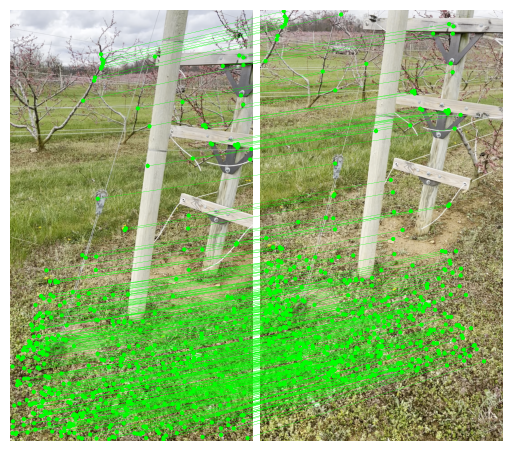

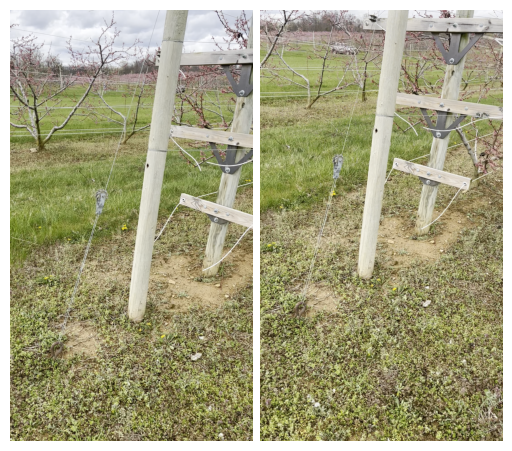

In [4]:
import matplotlib.pyplot as plt
import cv2 as cv
from feature_matching.LightGlue.lightglue import viz2d
from feature_matching.LightGlue.lightglue.utils import numpy_image_to_torch, rbd


    

    

def load_img(file, size, interpolation):
    img = cv.imread(file)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, size, interpolation=interpolation)
    return img


imgA = '.\\data\\train\\amy_gardens\\peach_0004.png'
imgB = '.\\data\\train\\amy_gardens\\peach_0008.png'
imgA = load_img(imgA, size=(576, 1024), interpolation=cv.INTER_AREA)
imgB = load_img(imgB, size=(576, 1024), interpolation=cv.INTER_AREA)


imgL = numpy_image_to_torch(imgA)
imgR = numpy_image_to_torch(imgB)
#img = cv.drawMatchesKnn(img1=imgL,keypoints1=feats0['keypoints'],img2=imgR,keypoints2=feats1['keypoints'],matches1to2=points,outImg=None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#plt.imshow(img)
#plt.show()

matches01 = points[2]
kpts0 = feats0["keypoints"]
kpts1 = feats1["keypoints"]
matches = points  # indices with shape (K,2)
points0 = points[0]  # coordinates in img0, shape (K,2)
points1 = points[1]  # coordinates in img1, shape (K,2)

axes = viz2d.plot_images([imgL, imgR])
viz2d.plot_matches(points0, points1, color='lime', lw=0.2)

kpc0, kpc1 = viz2d.cm_prune(matches01['prune0']), viz2d.cm_prune(matches01['prune1'])
viz2d.plot_images([imgL, imgR])
#viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=10)

#import matplotlib.image as mpimg
#f, axarr = plt.subplots(1,2)
#imgL = mpimg.imread(imgA)
#imgR = mpimg.imread(imgB)
#axarr[0].imshow(imgL)
#axarr[0].axis('off')
#axarr[1].imshow(imgR)
#axarr[1].axis('off')
#plt.show()

In [2]:
feats0 = get_DISK_features('.\\data\\train\\amy_gardens\\peach_0004.png')
feats1 = get_DISK_features('.\\data\\train\\amy_gardens\\peach_0008.png')
points0, points1 = match_features(image0_features=feats0, image1_features=feats1, descriptor='disk')

print(len(points0))
print(len(points1))

901
901
